In [1]:
import tensorflow as tf
tf.enable_eager_execution()

tfe = tf.contrib.eager # Shorthand for some symbols

In [2]:
from math import pi

def f(x):
  return tf.square(tf.sin(x))

assert f(pi/2).numpy() == 1.0


# grad_f will return a list of derivatives of f
# with respect to its arguments. Since f() has a single argument,
# grad_f will return a list with a single element.
grad_f = tfe.gradients_function(f)
assert tf.abs(grad_f(pi/2)[0]).numpy() < 1e-7

In [4]:
grad_f(pi/2)

[<tf.Tensor: id=30, shape=(), dtype=float32, numpy=-8.7422777e-08>]

In [5]:
grad_f(pi)

[<tf.Tensor: id=39, shape=(), dtype=float32, numpy=1.7484555e-07>]

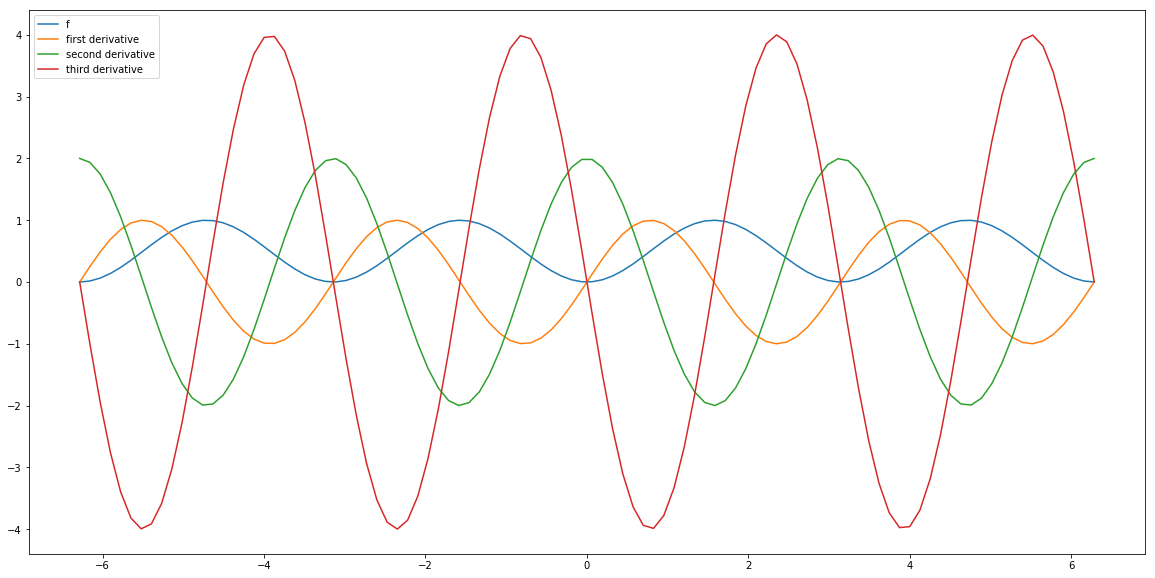

In [8]:
def f(x):
  return tf.square(tf.sin(x))

def grad(f):
  return lambda x: tfe.gradients_function(f)(x)[0]

x = tf.lin_space(-2*pi, 2*pi, 100)  # 100 points between -2π and +2π

import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
plt.plot(x, f(x), label="f")
plt.plot(x, grad(f)(x), label="first derivative")
plt.plot(x, grad(grad(f))(x), label="second derivative")
plt.plot(x, grad(grad(grad(f)))(x), label="third derivative")
plt.legend()